# CPM

In [1]:
# Import required libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/namanbhatt/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Request to store webpage structure from the URL
url = "https://www.guptamedia.com/social-media-ads-cost"
page = requests.get(url) 
soup = BeautifulSoup(page.text, 'html')

In [3]:
# Result
print(soup)

<!DOCTYPE html>
<html lang="en"><head>
<meta charset="utf-8"/>
<title>Social Media Ads Cost in 2024</title>
<link href="https://www.guptamedia.com/hubfs/Gupta-Social-Profile-1.jpg" rel="shortcut icon"/>
<meta content="A definitive guide to the cost of social media advertising on Facebook, Instagram, TikTok, Twitter/X and YouTube by month, day, week, and holiday season." name="description"/>
<meta content="bjudfhz0k19f1c84a9btdgaoeuut75" name="facebook-domain-verification"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="A definitive guide to the cost of social media advertising on Facebook, Instagram, TikTok, Twitter/X and YouTube by month, day, week, and holiday season." property="og:description"/>
<meta content="Social Media Ads Cost in 2024" property="og:title"/>
<meta content="A definitive guide to the cost of social media advertising on Facebook, Instagram, TikTok, Twitter/X and YouTube by month, day, week, and holiday season." name="twitter:d

In [4]:
# Locate the first table on the webpage
table = soup.find_all('table')[0]

In [5]:
soup.find_all('table')[0]

<table style="border-collapse: collapse; table-layout: fixed; margin-left: auto; margin-right: auto; border: 1px solid #99acc2;">
<tbody>
<tr>
<td style="border: 1pt solid #000000;">
<p><strong>PLATFORM</strong></p>
</td>
<td style="border: 1pt solid #000000;">
<p><strong>2024 AVG CPM RATE</strong></p>
</td>
</tr>
<tr>
<td style="border: 1pt solid #000000;">
<p>Meta (Facebook &amp; Instagram)</p>
</td>
<td style="border: 1pt solid #000000;">
<p>$6.99</p>
</td>
</tr>
<tr>
<td style="border: 1pt solid #000000;">
<p>TikTok</p>
</td>
<td style="border: 1pt solid #000000;">
<p>$3.59</p>
</td>
</tr>
<tr>
<td style="border: 1pt solid #000000;">
<p>Twitter/X</p>
</td>
<td style="border: 1pt solid #000000;">
<p>$3.11</p>
</td>
</tr>
<tr>
<td style="border: 1pt solid #000000;">
<p>YouTube</p>
</td>
<td style="border: 1pt solid #000000;">
<p>$3.07</p>
</td>
</tr>
</tbody>
</table>

In [6]:
# Locate all the rows in the table
rows = table.find_all('tr')

In [7]:
rows

[<tr>
 <td style="border: 1pt solid #000000;">
 <p><strong>PLATFORM</strong></p>
 </td>
 <td style="border: 1pt solid #000000;">
 <p><strong>2024 AVG CPM RATE</strong></p>
 </td>
 </tr>,
 <tr>
 <td style="border: 1pt solid #000000;">
 <p>Meta (Facebook &amp; Instagram)</p>
 </td>
 <td style="border: 1pt solid #000000;">
 <p>$6.99</p>
 </td>
 </tr>,
 <tr>
 <td style="border: 1pt solid #000000;">
 <p>TikTok</p>
 </td>
 <td style="border: 1pt solid #000000;">
 <p>$3.59</p>
 </td>
 </tr>,
 <tr>
 <td style="border: 1pt solid #000000;">
 <p>Twitter/X</p>
 </td>
 <td style="border: 1pt solid #000000;">
 <p>$3.11</p>
 </td>
 </tr>,
 <tr>
 <td style="border: 1pt solid #000000;">
 <p>YouTube</p>
 </td>
 <td style="border: 1pt solid #000000;">
 <p>$3.07</p>
 </td>
 </tr>]

In [8]:
# Empty list to store data
data_cpm = []

# Loop over each row in the table
for row in rows:
    cells = row.find_all('td')
    row_data = [cell.find('p').get_text(strip = True) for cell in cells]
    data_cpm.append(row_data)

# Result
data_cpm

[['PLATFORM', '2024 AVG CPM RATE'],
 ['Meta (Facebook & Instagram)', '$6.99'],
 ['TikTok', '$3.59'],
 ['Twitter/X', '$3.11'],
 ['YouTube', '$3.07']]

In [9]:
# Convert the list into a dataframe
df_cpm = pd.DataFrame(data_cpm[1:], columns = data_cpm[0])

df_cpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PLATFORM           4 non-null      object
 1   2024 AVG CPM RATE  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [10]:
# Remove dollar signs and commas and covert coloumn data type to float
df_cpm['2024 AVG CPM RATE'] = df_cpm['2024 AVG CPM RATE'].replace('[\$,]', '', regex = True).astype(float)

# Rename coloumn
df_cpm.rename(columns = {'2024 AVG CPM RATE' : '2024 AVG CPM RATE($)'}, inplace = True)

df_cpm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLATFORM              4 non-null      object 
 1   2024 AVG CPM RATE($)  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [11]:
# Required table
df_cpm

,PLATFORM,2024 AVG CPM RATE($)
0,Meta (Facebook & Instagram),6.99
1,TikTok,3.59
2,Twitter/X,3.11
3,YouTube,3.07


In [ ]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import re
import os

<Axes: xlabel='PLATFORM', ylabel='2024 AVG CPM RATE($)'>

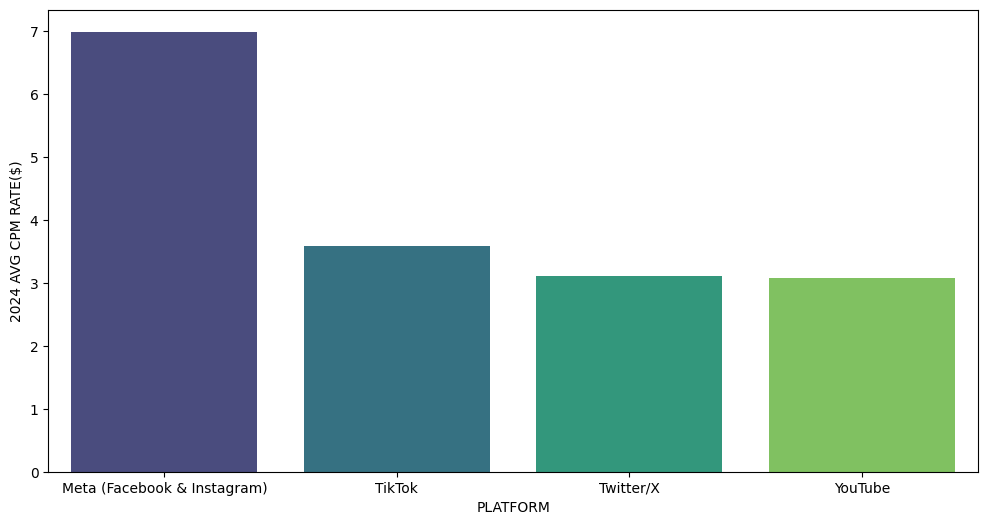

In [12]:
# Plot the CPM rate 
plt.figure(figsize = (12, 6))

sns.barplot(data = df_cpm, y = '2024 AVG CPM RATE($)', x = 'PLATFORM', hue = 'PLATFORM', palette = 'viridis', legend = False)